In [22]:
import keras
from keras import layers
from keras import backend as k

import theano
import theano.tensor as T

import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [25]:
# Check keras version
keras.__version__

'2.3.0'

In [26]:
# Check keras backend
k.backend()

'theano'

In [2]:
# Load data
BTSettl = pd.read_csv('..\data\BT-Settl_all_Myr_Gaia+2MASS+PanSTARRS.csv')
X = np.array(BTSettl[['age_Myr', 'M/Ms']])
Y = np.array(BTSettl[['Li', 'G', 'G_BP', 'G_RP', 'J', 'H', 'K', 'g_p1', 'r_p1', 'i_p1', 'y_p1', 'z_p1']])

# Split into train and test datasets
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)

In [15]:
# Define Neural Network: structure, activation, initializers, etc.
inputs = layers.Input(shape = (2,))
dense = layers.Dense(
    units = 8, 
    activation = "relu", 
    kernel_initializer = keras.initializers.RandomNormal(stddev=0.01),
    bias_initializer = keras.initializers.Zeros())(inputs)
dropout = layers.Dropout(0.2)(dense)
dense = layers.Dense(
    units = 8, 
    activation = "relu", 
    kernel_initializer = keras.initializers.RandomNormal(stddev=0.01),
    bias_initializer = keras.initializers.Zeros())(dropout)
outputs = layers.Dense(12)(dense)

In [16]:
# Instanciate and compile model
model = keras.Model(inputs, outputs)
model.compile(optimizer='adam', loss = 'mse', metrics=['accuracy'])

In [17]:
# Define early stopping feature from keras
early_stop = keras.callbacks.EarlyStopping(monitor = 'loss', min_delta = 0.01, patience = 100, mode = 'min', restore_best_weights = True)

# Train model
history = model.fit(x_train, y_train, epochs=1000, batch_size = 32, callbacks = [early_stop])

Epoch 1/1000
670/670 [==============================] - 0s 36us/step - loss: 88.8207 - accuracy: 0.0343
Epoch 2/1000
670/670 [==============================] - 0s 60us/step - loss: 82.7226 - accuracy: 0.0000e+00
Epoch 3/1000
670/670 [==============================] - 0s 48us/step - loss: 81.1414 - accuracy: 0.0000e+00
Epoch 4/1000
670/670 [==============================] - 0s 60us/step - loss: 78.9744 - accuracy: 0.0000e+00
Epoch 5/1000
670/670 [==============================] - 0s 48us/step - loss: 78.4722 - accuracy: 0.0000e+00
Epoch 6/1000
670/670 [==============================] - 0s 72us/step - loss: 77.3155 - accuracy: 0.0000e+00
Epoch 7/1000
670/670 [==============================] - 0s 60us/step - loss: 77.0197 - accuracy: 0.0000e+00
Epoch 8/1000
670/670 [==============================] - 0s 72us/step - loss: 77.1196 - accuracy: 0.0104
Epoch 9/1000
670/670 [==============================] - 0s 72us/step - loss: 75.0991 - accuracy: 0.2239
Epoch 10/1000
670/670 [=================

In [18]:
# Evaluate model
model.evaluate(x_test, y_test, batch_size = 32, callbacks = [early_stop])

168/168 [==============================] - 0s 48us/step


[3.9411041282472157, 1.0]

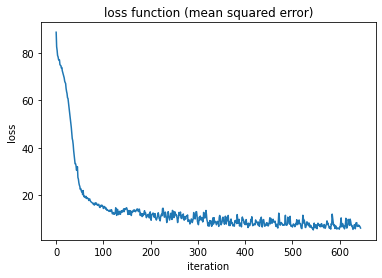

In [23]:
# Plot loss vs. iter
loss = history.history['loss']
iters = range(len(loss))

plt.title('loss function (mean squared error)')
plt.xlabel('iteration')
plt.ylabel('loss')
plt.plot(iters, loss)

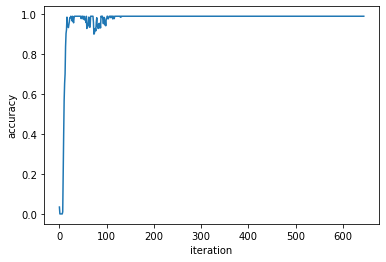

In [24]:
# Plot accuracy vs. iter
accuracy = history.history['accuracy']
iters = range(len(accuracy))

plt.xlabel('iteration')
plt.ylabel('accuracy')
plt.plot(iters, accuracy)

In [28]:
# Set grads
grads = theano.grad(model.total_loss, model.trainable_weights)
grads

[(dmean/ddense_4/kernel),
 (dmean/ddense_4/bias),
 (dmean/ddense_5/kernel),
 (dmean/ddense_5/bias),
 (dmean/ddense_6/kernel),
 (dmean/ddense_6/bias)]

In [29]:
# Check grads type
type(grads[0])

theano.tensor.var.TensorVariable